## The Effects of Population and Environmental Metrics on Worldwide Mental Health (Part II: Analysis)

### Team Members
Humaira Nasir (humairan)

Kate Wasmer (kwasmer)

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy.stats import f_oneway
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Descriptive Statistics

<b>Step 1:</b> Read in the data set exported from Part 1 and verify that the data was read in correctly. 

In [2]:
df_cleaned = pd.read_csv("merged_data_p1.csv")
df_cleaned.head()

,country,year,happiness,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,global_hunger_index,schizophrenia,bipolar_disorder,ed_nos,anxiety,addiction,depression,alcoholism
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,NaN,0.164639,0.704480,0.093589,4.860437,2.483862,4.129656,0.659501
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,NaN,0.164932,0.704925,0.095166,4.861533,2.543884,4.129972,0.661185
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,NaN,0.165130,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,NaN,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,34.3,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372


<b>Step 2:</b> Compute a function that will quickly return the descriptive statistics for a mental illness. Since our research focuses on mental health at the population level, I grouped these statistics by country name. 

In [3]:
def get_illness_statistics(dataset: pd.DataFrame, mental_illness: str) -> pd.DataFrame:
    """This function returns the descriptive statistics of a specified mental illness 
    within the data frame, grouped by country. 
    
    Keyword arguments: 
    dataset -- This is the data frame that we want to perform the analysis on. 
    illness -- This is the particular mental illness from the data frame that we
    want to study. In order to obtain the correct strings, please review the 
    column names of your data table. 
    """
    stats = dataset.groupby("country")[mental_illness].agg(["min", "mean", "median", "var", "max"])
    return stats

The following code below provides a snapshot of the overall mental illness statistics in each country. One thing that we were interesting in investigating was the epidemiology of illnesses with stronger genetic components (e.g., schizophrenia) versus disorders that have prominent environmental factors, so we included 4 different conditions to compare. 

In [4]:
get_illness_statistics(df_cleaned, "schizophrenia")

,min,mean,median,var,max
country,,,,,
Afghanistan,0.160022,0.162974,0.163146,5.133654e-06,0.166158
Albania,0.193393,0.196544,0.195908,7.942754e-06,0.201025
Algeria,0.192458,0.194960,0.194804,4.283679e-06,0.197913
American Samoa,0.248557,0.249785,0.249673,5.674110e-07,0.252311
Andorra,0.263512,0.264492,0.264397,5.077233e-07,0.266166
...,...,...,...,...,...
Vietnam,0.222736,0.233554,0.234154,4.642518e-05,0.244663
World,0.253503,0.254047,0.253903,1.931217e-07,0.254797
Yemen,0.169850,0.171712,0.171926,1.794027e-06,0.173332


In [5]:
get_illness_statistics(df_cleaned, "bipolar_disorder")

,min,mean,median,var,max
country,,,,,
Afghanistan,0.697779,0.702354,0.702208,0.000012,0.708089
Albania,0.695013,0.700091,0.700398,0.000010,0.704480
Algeria,0.802893,0.809903,0.809433,0.000033,0.818687
American Samoa,0.464999,0.467095,0.467349,0.000002,0.468515
Andorra,0.960506,0.964324,0.964090,0.000006,0.968843
...,...,...,...,...,...
Vietnam,0.539200,0.545323,0.545486,0.000020,0.552653
World,0.585743,0.590033,0.588376,0.000013,0.598083
Yemen,0.730038,0.733302,0.733788,0.000004,0.735682


In [6]:
get_illness_statistics(df_cleaned, "ed_nos")

,min,mean,median,var,max
country,,,,,
Afghanistan,0.086021,0.094261,0.093014,0.000044,0.107142
Albania,0.125320,0.145230,0.141691,0.000297,0.174046
Algeria,0.182169,0.194488,0.190625,0.000124,0.213612
American Samoa,0.177808,0.181259,0.180431,0.000006,0.187677
Andorra,0.578331,0.621480,0.635699,0.000804,0.652492
...,...,...,...,...,...
Vietnam,0.083484,0.102642,0.101124,0.000195,0.128466
World,0.177865,0.190053,0.187003,0.000123,0.211304
Yemen,0.119241,0.129697,0.129762,0.000062,0.140781


In [7]:
get_illness_statistics(df_cleaned, "depression")

,min,mean,median,var,max
country,,,,,
Afghanistan,4.071831,4.118622,4.125807,0.000313,4.136347
Albania,2.139903,2.190442,2.202694,0.000768,2.223407
Algeria,3.613148,3.657743,3.659080,0.000959,3.732597
American Samoa,2.936809,2.940850,2.940352,0.000010,2.946838
Andorra,3.707962,3.739451,3.733932,0.000407,3.768135
...,...,...,...,...,...
Vietnam,2.879450,2.910582,2.918838,0.000306,2.929882
World,3.439238,3.504355,3.532185,0.002122,3.550852
Yemen,3.963537,4.004947,4.008328,0.000235,4.020945


<b>Step 3:</b> Create a function that computes the mean of a specific mental illness by year. These descriptive statistics will be especially useful for time series analyses. 

In [8]:
# This function was written with the help of Copilot 
def get_mean_illness_by_year(dataset: pd.DataFrame, illness: str) -> pd.DataFrame:
    """This function allows us to see how the prevalence of a mental illness
    has changed over time. This is especially important, because we know 
    that some disorders have varying degrees of environmental factors in their 
    etiology. Others are strongly affected by genetics, so it is useful to see
    how these diagnosis rates change over the years. 
    
    Keyword arguments: 
    dataset -- This is the data frame that we want to perform the analysis on. 
    illness -- This is the particular mental illness from the data frame that we
    want to study. In order to obtain the correct strings, please review the 
    column names of your data table. 
    """
    mean_illness = dataset.groupby("year")[illness].mean()
    return mean_illness

In [9]:
# Verify that the previous function works as expected. 
get_mean_illness_by_year(df_cleaned, "bipolar_disorder")

year
1990    0.713111
1991    0.713426
1992    0.713749
1993    0.714062
1994    0.714366
1995    0.714633
1996    0.714881
1997    0.715149
1998    0.715429
1999    0.715707
2000    0.715964
2001    0.716203
2002    0.716454
2003    0.716716
2004    0.716982
2005    0.717236
2006    0.717504
2007    0.717816
2008    0.718150
2009    0.718468
2010    0.718726
2011    0.718944
2012    0.719175
2013    0.719432
2014    0.719699
2015    0.719977
2016    0.720256
2017    0.720544
2018         NaN
2019         NaN
2020         NaN
2021         NaN
Name: bipolar_disorder, dtype: float64

In [10]:
get_mean_illness_by_year(df_cleaned, "ed_nos")

year
1990    0.216995
1991    0.217173
1992    0.217453
1993    0.217890
1994    0.218461
1995    0.219176
1996    0.220160
1997    0.221464
1998    0.222960
1999    0.224552
2000    0.226055
2001    0.227648
2002    0.229544
2003    0.231597
2004    0.233628
2005    0.235473
2006    0.237384
2007    0.239620
2008    0.241998
2009    0.244170
2010    0.245988
2011    0.247461
2012    0.248974
2013    0.250504
2014    0.252015
2015    0.253479
2016    0.254782
2017    0.256030
2018         NaN
2019         NaN
2020         NaN
2021         NaN
Name: ed_nos, dtype: float64

<b>Step 4:</b> Compute the mean social support level for each country, and then perform descriptive statistics at the global level. The quartiles will be used to divide countries into 4 categories based on their social support systems. 

In [11]:
social_support_mean = df_cleaned.groupby("country")["social_support"].mean()

In [12]:
social_support_mean.describe()

count    155.000000
mean       0.804271
std        0.116742
min        0.402400
25%        0.740282
50%        0.818154
75%        0.900895
max        0.976857
Name: social_support, dtype: float64

<b>Step 5:</b> Compute the descriptive statistics for GDP per capita (log). Analogous to the social support category, the quartiles will be used to divide countries into affluency groups based on the GDP. 

In [13]:
mean_gdp_per_country = df_cleaned.groupby("country")["gdp_per_capita"].mean()

In [14]:
mean_gdp_per_country.dropna()

country
Afghanistan     7.650833
Albania         9.384385
Algeria         9.329400
Angola          8.990000
Argentina      10.033800
                 ...    
Venezuela       9.495273
Vietnam         8.647700
Yemen           8.217143
Zambia          8.066857
Zimbabwe        7.850333
Name: gdp_per_capita, Length: 155, dtype: float64

In [15]:
mean_gdp_per_country.describe()

count    155.000000
mean       9.283871
std        1.190771
min        6.722400
25%        8.353000
50%        9.340933
75%       10.254208
max       11.607091
Name: gdp_per_capita, dtype: float64

<b>Step 6:</b> Define respective functions for dividing the GDP and the social support levels into 4 different categories, ranking from high to low. 

In [16]:
def get_gdp_score(gdpLog: float) -> str: 
    """This function classifies a country's GDP into one of 4 categories 
    from Low to High. The baseline for the categories is quantified 
    by the quartiles computed in the descriptive statistics section. 

    Keyword arguments: 
    gdpLog -- A country's gross domestic product (GDP) per capita, with 
    log transformation included. 
    """
    if (gdpLog >= 10.2685): 
        return "High"
    elif (gdpLog >= 9.546):
        return "Medium-High"
    elif (gdpLog >= 8.39375):
        return "Medium"
    else:
        return "Low"

In [17]:
def get_social_support_score(social_support: float) -> str:
    """This function classifies a country's social support into one of 4 
    categories from Low to High. The baseline for the categories is quantified 
    by the quartiles computed in the descriptive statistics section. 

    Keyword arguments: 
    social_support -- A country's mean social support score, on a scale from 
    0 to 1. 
    """
    if (social_support >= 0.900895): 
        return "High"
    elif (social_support >= 0.818154):
        return "Medium-High"
    elif (social_support >= 0.740282):
        return "Medium"
    else:
        return "Low"

<b>Step 7:</b> Verify that the functions work as expected, and extract the head of the modified data frame. 

In [18]:
df_cleaned["gdp_category"] = df_cleaned["gdp_per_capita"].apply(get_gdp_score)
df_cleaned["social_support_category"] = df_cleaned["social_support"].apply(get_social_support_score)
df_cleaned.head()

,country,year,happiness,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,global_hunger_index,schizophrenia,bipolar_disorder,ed_nos,anxiety,addiction,depression,alcoholism,gdp_category,social_support_category
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,NaN,0.164639,0.704480,0.093589,4.860437,2.483862,4.129656,0.659501,Low,Low
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,NaN,0.164932,0.704925,0.095166,4.861533,2.543884,4.129972,0.661185,Low,Low
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,NaN,0.165130,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062,Low,Low
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,NaN,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254,Low,Low
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,34.3,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372,Low,Low


<b>Reporting & Interpretation</b>: One of the main takeaways from computing descriptive statistics was realizing that we would need to aggregate the countries in some way, shape, or form, since visualizing data for over 100 countries would be very tedious. 

That being said, the `get_illness_statistics()` function was extremely helpful in providing insight to the epidemiology of mental health disorders. Our assumption about highly heritable conditions differing from the other illnesses was supported by their variances. Schizophrenia is known to run in families and is the subject of many genetic studies, so it did not surprise me that the variances were extremely small (typically ranging from 5 leading zeros to 7 leading zeros). 

The "World" row was important in providing an aggregated variance for all 4 of the outputs. The world variances for schizophrenia and bipolar disorder had more leading zeros (respectively 7 and 4) than eating disorders and depression (respectively 3 and 2). This discrepancy did not surprise me, since highly heritable disorders would stay consistent throughout time. 

This consistency over time was also backed up by the findings from `get_mean_illness_by_year()`; for instance, the rate of bipolar disorder did not appear to change much over time, while the rate of eating disorders did. 

The other important finding from this preliminary analysis was that using quartiles is an excellent way to divide countries into different categories. Since we wanted to look at social factors, we decided to do this for both the `social_support` and `gdp_per_capita` predictors. For the former, I was surprised to find that the lowest quartile captured the widest range of data. The minimum social support score of 0.402, and Q1 was equal to 0.74. This suggests that many people around the world are dissatisfied with their government's approach to social equity, thus justifying our decision to split countries by social support levels. 

### Inferential Statistics

<b>Step 1a</b>: Compute an ANOVA of the different social support groups and their happiness score. 

$H_{0}:$ All of the social support categories have the same mean happiness score. 

$H_{A}:$ One of more of the social support categories has a statistically significant happiness score that differs from the others. 

$\alpha = 0.05$

In [19]:
support_A = df_cleaned[df_cleaned["social_support_category"] == "High"].dropna()
support_B = df_cleaned[df_cleaned["social_support_category"] == "Medium-High"].dropna()
support_C = df_cleaned[df_cleaned["social_support_category"] == "Medium"].dropna()
support_D = df_cleaned[df_cleaned["social_support_category"] == "Low"].dropna()
f_oneway(support_A["happiness"], support_B["happiness"],
         support_C["happiness"], support_D["happiness"])

F_onewayResult(statistic=31.90775681622462, pvalue=1.4121485085688414e-15)

<b>Step 1b</b>: Visualize the ANOVA with boxplots. 

Text(0, 0.5, 'Happiness Score')

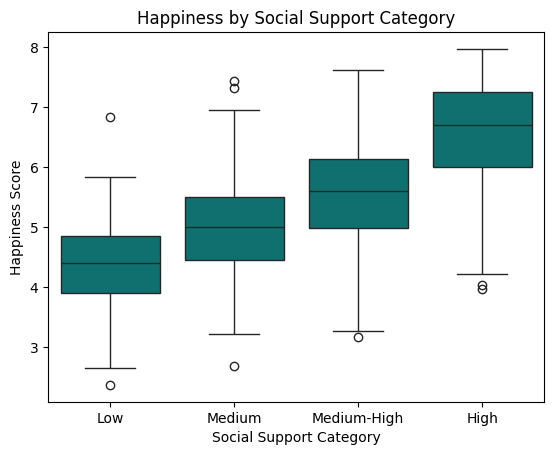

In [20]:
ax = sns.boxplot(x="social_support_category",y="happiness", data=df_cleaned, 
                 color = "teal", order=["Low", "Medium", "Medium-High", "High"])
ax.set_title("Happiness by Social Support Category")
ax.set_xlabel("Social Support Category")
ax.set_ylabel("Happiness Score")

<b>Step 2:</b> Compute Tukey's HSD for the social support categories. 

$H_{0}:$ All of the social support groups have the same mean happiness score. 

$H_{A}:$ Two or more of the social support groups have statistically significant different means when compared to one another. 

$\alpha = 0.05$

In [21]:
social_happiness = df_cleaned[["happiness", "social_support_category"]].dropna()
tukey = pairwise_tukeyhsd(social_happiness['happiness'], social_happiness['social_support_category'])
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-2.1987,0.0,-2.3306,-2.0669,True
High,Medium,-1.5697,0.0,-1.7105,-1.4288,True
High,Medium-High,-1.024,0.0,-1.1534,-0.8947,True
Low,Medium,0.6291,0.0,0.4839,0.7742,True
Low,Medium-High,1.1747,0.0,1.0407,1.3088,True
Medium,Medium-High,0.5456,0.0,0.4027,0.6886,True


<b>Step 3a:</b> Compute an ANOVA for each GDP category and their happiness score. 

$H_{0}:$ All of the GDP categories have the same mean happiness score. 

$H_{A}:$ One of more of the GDP categories has a statistically significant happiness score that differs from the others. 

$\alpha = 0.05$

In [22]:
# Compute ANOVA for each GDP category and happiness (source: Copilot)
df_cleaned_A = df_cleaned[df_cleaned["gdp_category"] == "High"].dropna()
df_cleaned_B = df_cleaned[df_cleaned["gdp_category"] == "Medium-High"].dropna()
df_cleaned_C = df_cleaned[df_cleaned["gdp_category"] == "Medium"].dropna()
df_cleaned_D = df_cleaned[df_cleaned["gdp_category"] == "Low"].dropna()
f_oneway(df_cleaned_A["happiness"], df_cleaned_B["happiness"],
         df_cleaned_C["happiness"], df_cleaned_D["happiness"])

F_onewayResult(statistic=37.772180929654134, pvalue=1.0879314888563451e-17)

<b>Step 3b</b>: Visualize the ANOVA with boxplots.

Text(0, 0.5, 'Happiness Score')

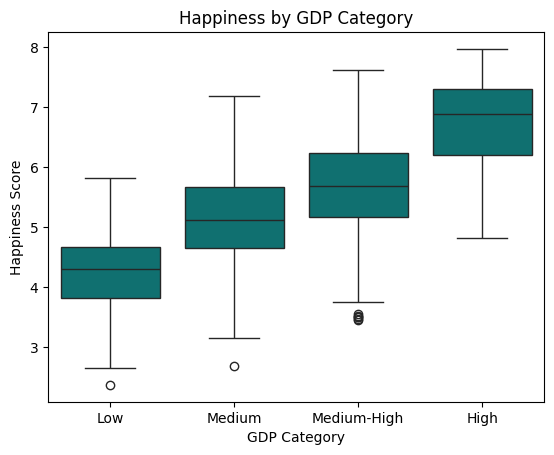

In [23]:
ax = sns.boxplot(x="gdp_category",y="happiness", data=df_cleaned, color = "teal")
ax.set_title("Happiness by GDP Category")
ax.set_xlabel("GDP Category")
ax.set_ylabel("Happiness Score")

<b>Step 4:</b> Compute Tukey's HSD for the GDP categories.

$H_{0}:$ All of the GDP groups have the same mean happiness score. 

$H_{A}:$ Two or more of the GDP groups have statistically significant different means when compared to one another. 

$\alpha = 0.05$

In [24]:
gdp_happiness = df_cleaned[["happiness", "gdp_category"]].dropna()
tukey = pairwise_tukeyhsd(gdp_happiness['happiness'], gdp_happiness['gdp_category'])
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-2.4873,0.0,-2.6089,-2.3657,True
High,Medium,-1.5916,0.0,-1.7099,-1.4734,True
High,Medium-High,-1.0544,0.0,-1.1803,-0.9285,True
Low,Medium,0.8957,0.0,0.7774,1.0139,True
Low,Medium-High,1.4329,0.0,1.3071,1.5588,True
Medium,Medium-High,0.5372,0.0,0.4147,0.6598,True


<b>Step 5a:</b> Perform a multiple linear regression on the mental health predictors to determine happiness outcome. 

$H_{0}:$ None of the predictors (mental illness rates) have an impact on overall happiness. If we represent each predictor coefficient with $\beta_{0}, ... \beta_{p}$, this indicates that $\beta_{0} = ... = \beta_{p} = 0$. 

$H_{A}:$ At least one of the predictors has an effect on overall happiness, which means that for $i \in 0, ..., p$, at least one $\beta_{i} \neq 0$.

$\alpha = 0.05$

In [25]:
model = smf.ols(formula = "happiness ~ bipolar_disorder + schizophrenia \
                 + depression + ed_nos + anxiety + addiction + alcoholism", 
                 data = df_cleaned)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     391.1
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          9.40e-318
Time:                        10:07:26   Log-Likelihood:                -1337.0
No. Observations:                1341   AIC:                             2690.
Df Residuals:                    1333   BIC:                             2732.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.6404      0.214     12.356      0.000       2.221       3.060
bipolar_disorder     1.4308      0.214      6.691      0.000       1.011       1.850
schizophrenia        8.0703      0.689     11.706      0.000       6.718       9.423
depression          -0.2904      0.032     -9.152      0.000      -0.353      -0.228
ed_nos               2.9767      0.236     12.595      0.000       2.513       3.440
anxiety             -0.0556      0.024     -2.289      0.022      -0.103      -0.008
addiction            0.1667      0.048      3.499      0.000       0.073       0.260
alcoholism           0.1843      0.019      9.781      0.000       0.147       0.221
==============================================================================
Omnibus:                        2.927   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                2.762
Skew:                          -0.061   Prob(JB):                        0.251
Kurtosis:                       2.814   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Step 5b</b>: Create a function that prints the entire p-value, rather than rounded to 2 decimal places. 

In [26]:
def extend_p_values(model: sm.regression.linear_model.OLS, numPredictors: int) -> None: 
    """This function is used in order to show the p-values for each predictor 
    in the linear regression model. Since the summary function only shows the 
    p-values rounded to the nearest thousandth, this is not helpful in cases 
    where we have extremely small p-values.
    
    Keyword arguments:
    model--This is the predictive model that we want to extract the p-values 
    from. In this case, we are looking at an OLS model, so the data type is 
    sm.regression.linear_model.OLS. 
    numPredictors: This is the number of predictors in our current OLS model. 
    This is important because in some cases, we might want to drop predictors that
    are not statistically significant, so it's good to keep track of the count. 
    """
    for i in range(numPredictors + 1):
        print(model.pvalues[i])

In [27]:
extend_p_values(results, 7)

2.7797396889995947e-33
3.2524166144371705e-11
3.358584349566848e-30
2.0309730671837392e-19
1.9011820196907551e-34
0.022249977877662926
0.00048294458772462224
7.21137359653265e-22


/var/folders/np/r8bkr3hd3bsdsjvxgq559f0h0000gn/T/ipykernel_17894/577400685.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.pvalues[i])


<b>Reporting & Interpretation</b>: The ANOVA, comparative boxplots, Tukey's HSD, and the multiple regression analysis all complemented each other nicely. Binning is a key component of data science and data mining, so it's a good idea to verify that the different bins are effective in categorizing the data set. 

For this reason, we decided to perform an ANOVA for both of our newly created subgroups. This test yielded an F-statistic of 1.14e-15 for the social support categories, and p = 1.09e-17 for the GDP categories. Both of these values were extremely statistically significant, indicating that at least one of the groups had a different mean from the others. 

After computing the ANOVA, we decided that it would be useful to compare the differences between every possible pair, which is where the Tukey's HSD comes into effect. The libraries we imported allow for a very simple way to determine whether to accept or reject the null hypothesis at $\alpha = 0.05$; this is part of the reason why we decided to perform this test after the ANOVA. All of the pairs for the GDP and social support subgroups were found to have statistically significant differences (indicated by "reject = true" in the output). 

The boxplots provided a quick and easy way to visualize these differences. As the GDP category moved from "Low" to "High", the average happiness score increased. The same phenomenon occurred for the social support categories. 

Finally, the multiple linear regression revealed how each mental illness impacted a society's overall happiness. All of the predictor coefficients were statistically significant at our specified threshold. The schizophrenia coefficient ($\beta_{2} = 8.0703$) particularly stood out to us, since this means that countries with higher schizophrenia rates have a higher overall happiness score. Since we know schizophrenia is a mostly genetic disorder, I believe the rationale behind this is due to the quality of healthcare and diagnosis rates. Countries with better healthcare systems allow for accessible diagnoses and treatments, so while schizophrenia may be diagnosed more often in "happier" countries, there are also better treatments. 

### Graphical Analysis 

<b>Step 1:</b> Plot the distributions of mean GDP per country and the mean social support score per country. 

Text(0.5, 0, 'Log GDP by Country')

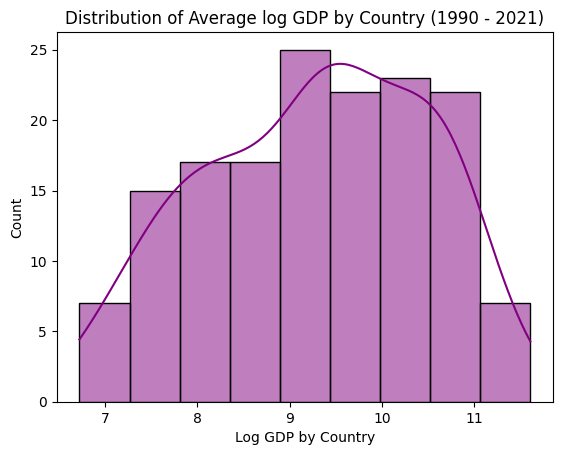

In [28]:
plot = sns.histplot(mean_gdp_per_country, kde=True, color="purple")
plot.set_title ("Distribution of Average log GDP by Country (1990 - 2021)")
plot.set_xlabel("Log GDP by Country")

Text(0.5, 0, 'Social Support Level')

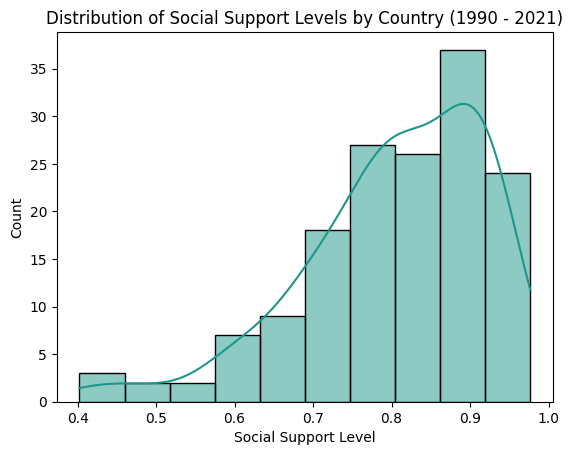

In [29]:
plot = sns.histplot(social_support_mean, kde=True, color="#1F968BFF")
plot.set_title ("Distribution of Social Support Levels by Country (1990 - 2021)")
plot.set_xlabel("Social Support Level")

<b>Step 2:</b> Create a scatterplot that shows the relationship between world happiness and GDP per capita. 

Text(0.5, 1.0, 'The Relationship Between World Happiness and GDP per Capita')

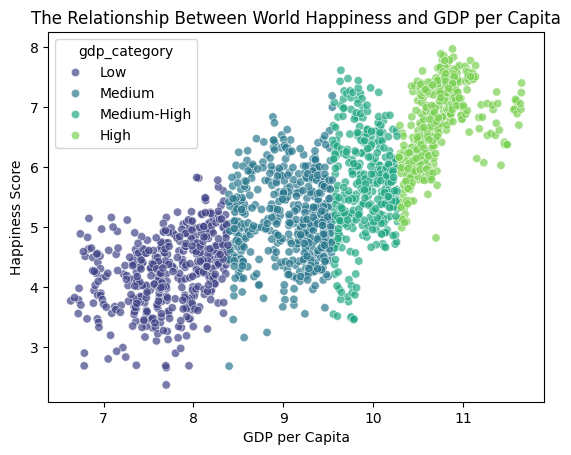

In [30]:
plot = sns.scatterplot(df_cleaned, x="gdp_per_capita", y="happiness", hue="gdp_category",
                palette="viridis", alpha=0.7)
plot.set_xlabel("GDP per Capita")
plot.set_ylabel("Happiness Score")
plot.set_title("The Relationship Between World Happiness and GDP per Capita")

Text(0.5, 1.0, 'Heatmap of Environmental Factors and Mental Disorders')

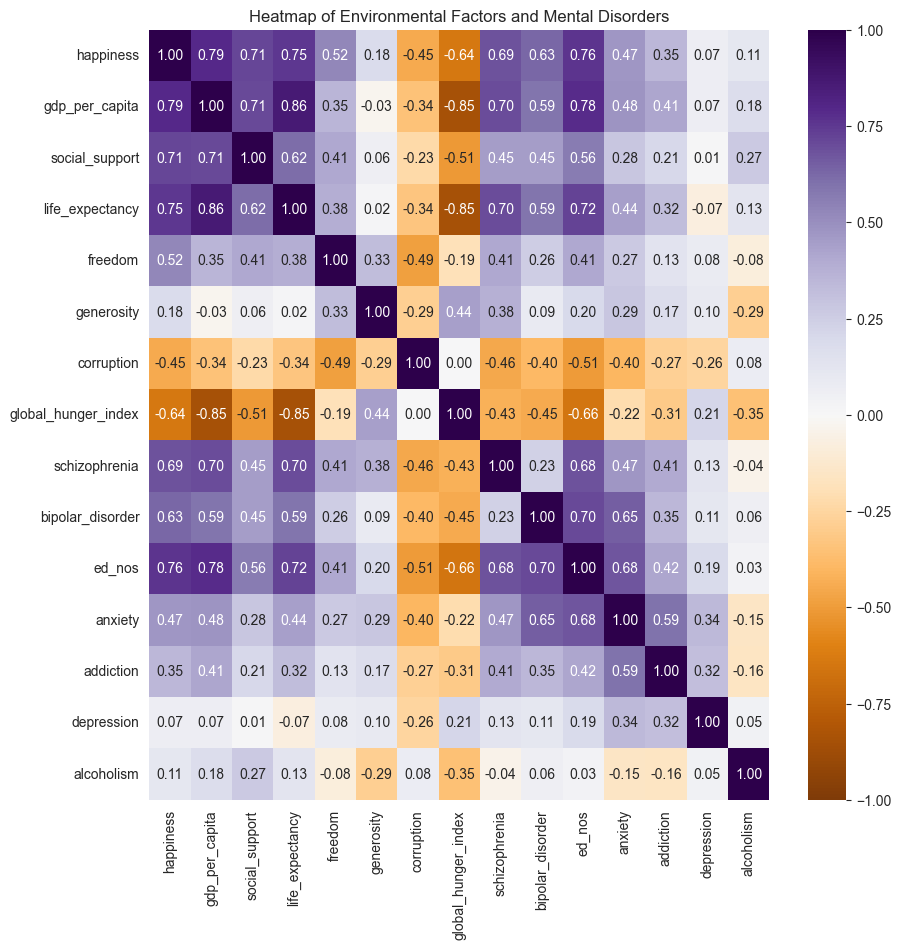

In [37]:
df_cleaned_floats = df_cleaned.select_dtypes(include=[np.float64])
corrmat = df_cleaned_floats.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrmat, annot=True, cmap="PuOr", vmax=1, vmin=-1,
            fmt=".2f", ax=ax)\
    .set_title("Heatmap of Environmental Factors and Mental Disorders")

<b>Reporting & Interpretation</b>: Based on the descriptive statistics for the social support and GDP predictors, we thought it would be worthwhile to visualize their distribution. The difference in skewness was notable. The GDP distribution was normal, which could be due to the log transformation done on the initial dataset, even before we downloaded it. Log transformations are, in fact, a common solution to oddly distributed data, so I think that this shows the GDP transformation was a good choice. The social support distribution, however, was negatively skewed. This corresponds with the findings in the descriptive statistics. By definition, a left-skewed graph always has a smaller mean than median, and a smaller median than mode. Therefore, most of the data points were to the left of the mode (roughly 0.85), which agrees with the claim that most people do not feel that their government thoroughly supports their social needs. 

We were also curious to see how world happiness correlated with GDP per capita, which is why we created the 2-dimensional scatterplot. The sharp distinction between each GDP category was very noticeable, and there was a clear increase in happiness as the GDP increased. This was consistent with our findings in the ANOVA.

Finally, we wanted to compute a heatmap that showed the correlation between all environmental/social factors and mental health disorders. One component that stood out to me was the high correlations between eating disorders and factors that improve quality of life (e.g., social support). In countries with higher poverty rates, getting access to food is one of the highest priorities. However, in many developed countries, this is not as pressing of an issue. There is also a problem in many developed countries with how the media portrays the "ideal body", which can cause many people to develop body image issues. This is likely a huge reason why eating disorders are so prominent in "first world" countries. 

The strong negative correlations among the corruption and global_hunger_index predictors were also interesting. Both of these variables were negatively correlated with happiness, life expectancy, and social support. Paradoxically, they were *also* negatively correlated with mental illness rates. This gives more credence to the issue of diagnosis rates; if every population had the same access to a psychiatrist, I believe these correlations would be much different.  

### Comparative Analysis

<b>Step 1</b>: Find the most highly correlated pairs.

In [38]:
# Get upper triangle of the correlation matrix (source: Copilot)
upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool_))
# Find top correlations, based on absolute value (source: Copilot)
top_corr = upper.stack().sort_values(ascending=False)
abs(top_corr).sort_values(ascending=False).head(5)

gdp_per_capita   life_expectancy        0.860163
life_expectancy  global_hunger_index    0.846209
gdp_per_capita   global_hunger_index    0.845031
happiness        gdp_per_capita         0.793122
gdp_per_capita   ed_nos                 0.784441
dtype: float64

<b>Step 2:</b> Perform a time series analysis on the prevalence of mental health and well-being, grouped by GDP category. 

In [34]:
def plot_prevalence_per_year_by_gdp(row:int, col:int, disorder: str) -> None:
    """ This function returns a line plot of the prevalence of a mental disorder 
    over time, stratified by GDP category. This is useful for visualizing how
    the prevalence of mental disorders has changed over time, and whether there
    are any differences in prevalence based on GDP category.

    Keyword arguments:
    row -- This is the row position of the plot in the grid of plots.
    col -- This is the column position of the plot in the grid of plots.
    disorder -- This is the mental disorder that we want to plot the prevalence
    of over time.
    
    (This description was written with the help of Copilot.)
    """
    df_cleaned_filtered = df_cleaned[df_cleaned.year > 2005]
    plot = sns.lineplot(ax=ax[col, row], data = df_cleaned_filtered, x = "year", y = disorder, 
                        hue = "gdp_category", palette = "colorblind", dashes=None, 
                        errorbar=None, hue_order=["High", "Medium-High", "Medium", "Low"],legend=False)

Text(0.5, 0.9, 'Mental Health & Well-Being by GDP Category (2006-2017)')

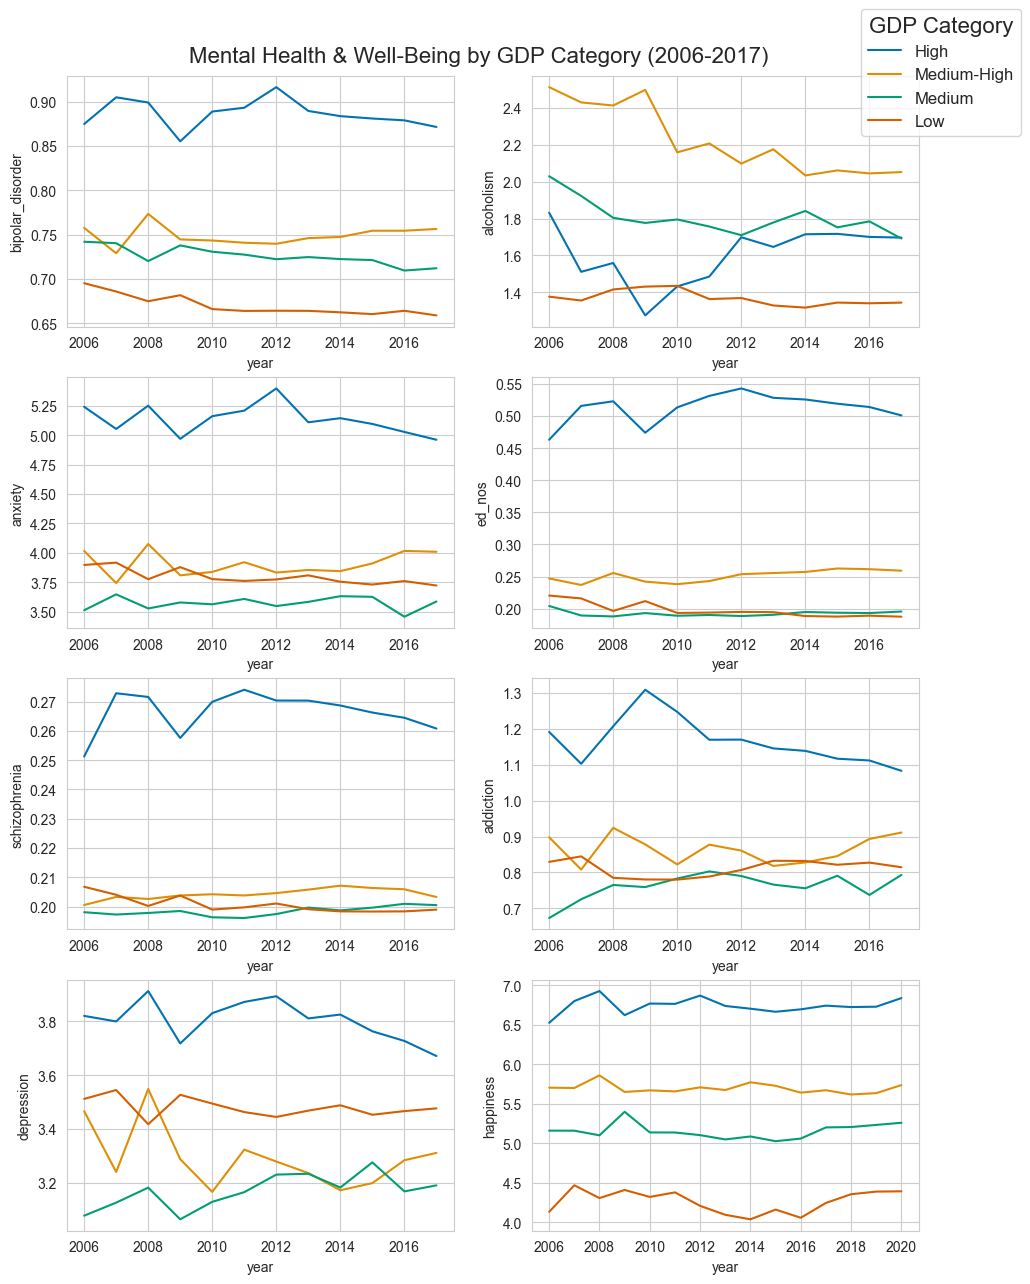

In [39]:
fig, ax = plt.subplots(nrows= 4, ncols=2, figsize= (11, 15))
plot_prevalence_per_year_by_gdp(0,0,"bipolar_disorder")
plot_prevalence_per_year_by_gdp(0,1,"anxiety")
plot_prevalence_per_year_by_gdp(0,2,"schizophrenia")
plot_prevalence_per_year_by_gdp(0,3,"depression")
plot_prevalence_per_year_by_gdp(1,0,"alcoholism")
plot_prevalence_per_year_by_gdp(1,1,"ed_nos")
plot_prevalence_per_year_by_gdp(1,2,"addiction")
plot_prevalence_per_year_by_gdp(1,3,"happiness")
fig.legend(["High", "Medium-High", "Medium", "Low"], loc = "outside upper right", title= "GDP Category",bbox_to_anchor=(1, .93), fontsize=12, title_fontsize=16)
fig.suptitle("Mental Health & Well-Being by GDP Category (2006-2017)", fontsize= 16, y=.9)

<b>Reporting & Interpretation</b>: Based off of the correlation heatmap from the Graphical Analysis section, we wanted to dive deeper into the variables with the highest correlations. Our findings suggested that GDP per capita, happiness, life expectancy, and eating disorders had the highest absolute value correlations. Specifically, the positive correlations were between GDP per capita and happiness (r = 0.793122), GDP per capita and life expectancy (r = 0.860163), and GDP per capita and eating disorders (r = 0.784441). The negative correlations were between GDP per capita and global hunger (r = -0.845031), and life expectancy and global hunger (r = -0.846209). This supports the connection between affluence and happiness. 

We also found it fitting to perform a time series analysis, since many of the datasets kept track of mental illness rates over the past decade (at the least). For every disorder except for alcoholism, countries in the highest GDP category had the highest rates of the condition, which ties back to the diagnosis rates. Alcoholism was highest in the "medium-high" category. There was an extreme decrease in alcoholism rates in 2008-2010, which suggests there might have been some laws prohibiting alcohol in various "first world" countries. 

While most of the mental illnesses rates corresponded with a higher GDP class, depression was not. Although the "High" class had the greatest percentage of individuals with depression, the "Low" class was second. This makes sense since happiness and depression are conversely related. 

### Multivariate Analysis

Compute a pairplot based off of the top correlated variables from the comparative analysis. 

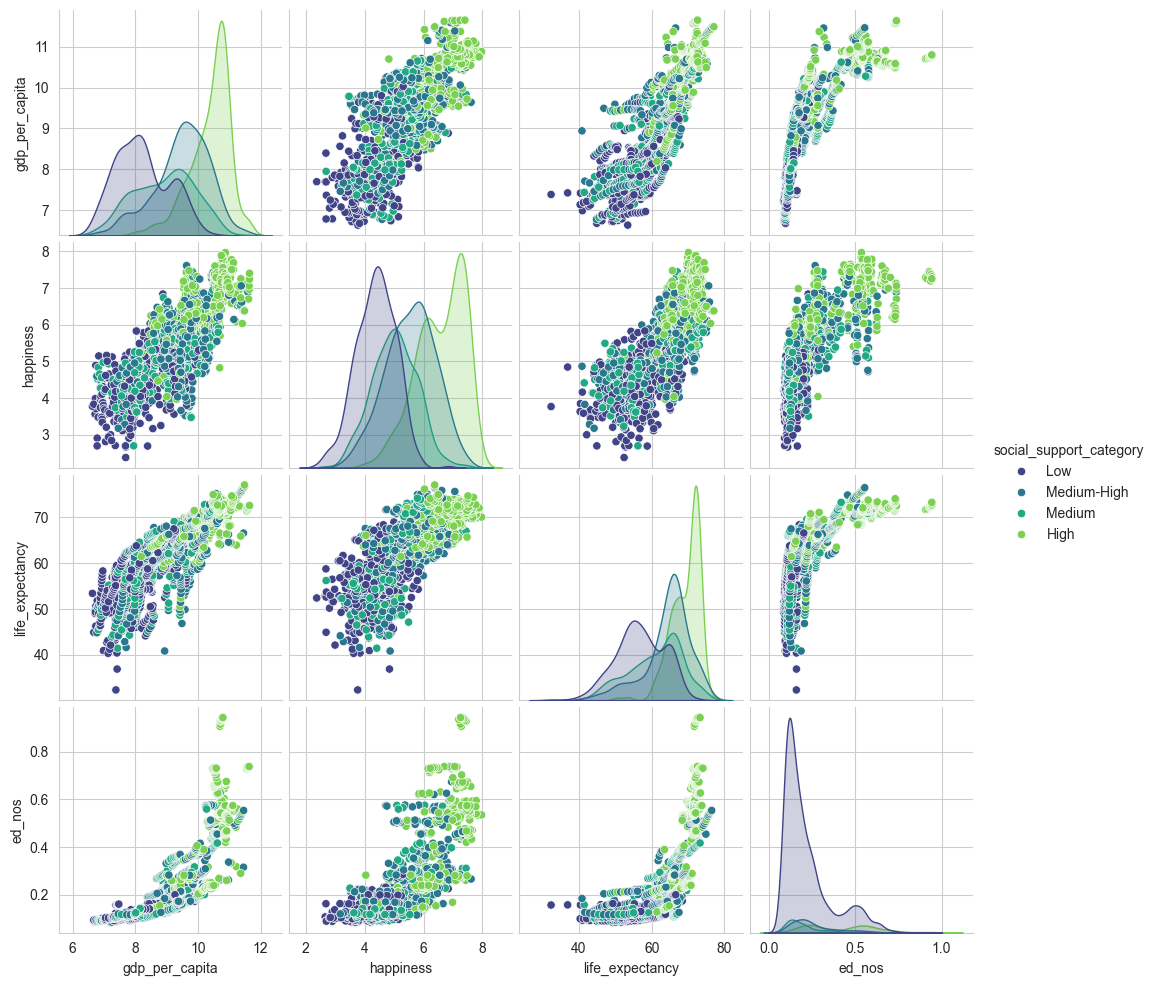

In [40]:
sns.set_style("whitegrid")
sns.pairplot(df_cleaned, vars=["gdp_per_capita", "happiness", "life_expectancy", "ed_nos"],
             hue="social_support_category", palette="viridis", diag_kind="kde")
plt.show()

<b>Reporting & Interpretation</b>: For our multivariate analysis, we decided to reduce the variables to the top 5 correlated pairs found in the comparative analysis. The reasoning for this was because a smaller subset of variables makes for more efficient visualization. Furthermore, we didn't want our analysis to be more complex than necessary. 

This reduction of variables allowed for effective storytelling, for lack of a better term. In the pairplots, the countries with higher social supports had higher life expectancy, higher GDP per capita, and higher overall happiness. 

### Synthesis

The overall relationship between happiness and the prevalence of certain mental disorders in a given population can be estimated by the multiple linear regression provided in the inferential statistics section. All of the parameters were statistically significant, but their weights were different. One thing that surprised us was that the coefficients for anxiety and depression were smaller than expected. Both of them had a negative correlation with happiness, but the values were respectively -0.06 and -0.29, both of which paled in comparison to the other parameters. In general, however, we found that countries with world happiness actually had *higher* rates of mental illnesses, due to the health equity reasons mentioned in previous sections. To see how these trends changed over time, we used the time series analysis. We found that the rates mostly stayed stagnant over the time span of 2006 to 2017, with only minor changes. This is likely due to aggregation, as well as the limited time span available.  

Our second question focused on the environmental factors correlated with mental health diagnoses. This could easily be answered with the correlation matrix and was consistent with the idea of more affluent countries having more diagnoses. In particular, life expectancy and GDP played major roles in these correlations.  

Finally, we wanted to learn how the level of social support in a country impacted its mental health rates. The pairplot allowed us to see these differences, and once again, we saw the phenomenon of higher eating disorder rates in countries with higher social supports. Another explanation for this is that more developed countries have raised awareness about EDNOS, and therefore have refined treatment programs that allow people who suffer from this disease to become healthy again. 

Merging the initial data frames was very important in this analysis. In particular, merging the global hunger data set with the world happiness data set allowed us to see the strong correlations between hunger, happiness, and life expectancy. 

### Reflection

One of the major takeaways from this part of the project was that data analytics requires a high degree of flexibility and open-mindedness. As data scientists, we might be adamant on solving a problem one way but realize there is a better solution. For instance, we considered merging the data sets based off of country codes rather than country names, since some countries were spelled differently (e.g., Turkey vs. Türkiye, Palestine vs. Palestinian Territories, etc.). However, not all of the data sets had a country code, so the merging only showed a limited subset, which was not what we wanted. Therefore, we had to scrap that idea and do our original merging method. 

Another challenge we faced was figuring out the appropriate color palettes for data visualization. It can be very fun to experiment around with different colors, but they need to be both visually pleasing *and* distinct enough that they separate different categories. One solution to this issue was to use color schemes within the "viridis" palette. The color schemes are known for their accessibility, and the distinct differences were evident in our visualizations. 

One of the main limitations of our analysis were the gaps in information. For instance, many countries did not track mental health rates until the mid-2000s; for that reason, we could only create comparative graphs from 2006 to 2017. Additionally, the countries were not grouped by continent or subregion. I think that would have been a very great way to aggregate the data, especially since it could dispel misconceptions about different regions of the world. However, these limitations could be solved with machine learning techniques, which is something to keep in mind for the next part of the project. 